In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv', engine = 'python')
df.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\Sanket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution')

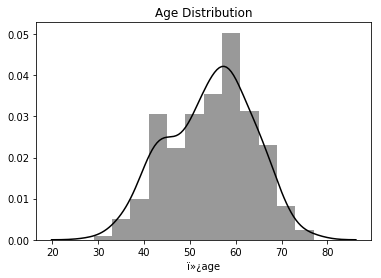

In [10]:
# I don't know why its not imported as age
sns.distplot(df['ï»¿age'],hist=True,kde=True, color = 'black')
plt.title('Age Distribution')

C:\Users\Sanket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


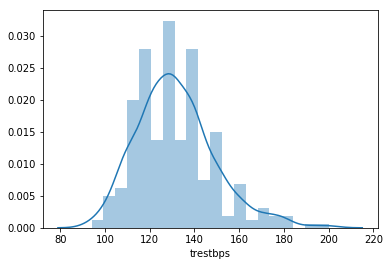

In [41]:
sns.distplot(df.trestbps, bins = 20) 
plt.show()

C:\Users\Sanket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


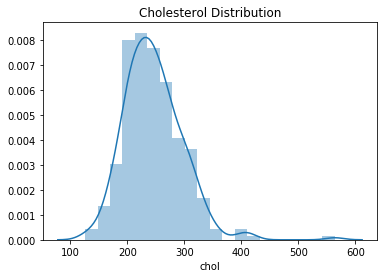

In [42]:
sns.distplot(df.chol, bins = 20)
plt.title('Cholesterol Distribution')
plt.show()

Text(0.5,1,'Cholesterol Analysis')

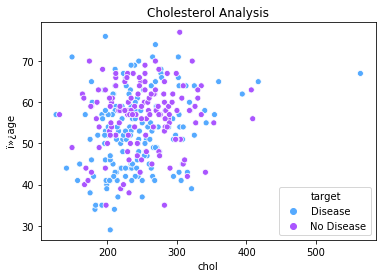

In [37]:
sns.scatterplot(x = "chol", y = 'ï»¿age', hue= "target", palette = "cool", data=df)
plt.title('Cholesterol Analysis')

Text(0.5,1,'Sex Distribution')

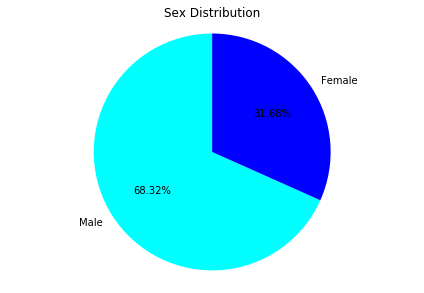

In [21]:
labels_dict_sex = {0:'Female',1:'Male'}
labels_sex =df['sex'].value_counts().rename(index=labels_dict_sex).index
values_sex =df['sex'].value_counts().values
colors_sex = ['cyan','blue']
plt.pie(values_sex,explode=None,labels=labels_sex,colors=colors_sex,startangle=90,autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.title('Sex Distribution')

Text(0.5,1,'Target Distribution')

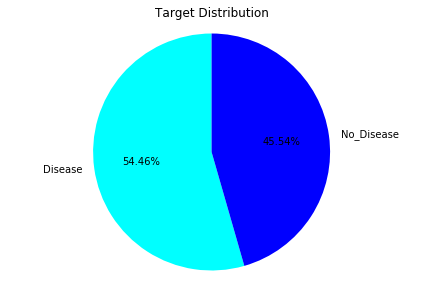

In [22]:
labels_dict_target = {0:'No_Disease',1:'Disease'}
labels_target = df['target'].value_counts().rename(index=labels_dict_target).index
values_target = df['target'].value_counts().values
colors_target = ['cyan','blue']
plt.pie(values_target,explode=None,labels=labels_target,colors=colors_target,shadow=False,
        startangle=90,autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.title('Target Distribution')

Text(0.5,1,'Disease Distribution')

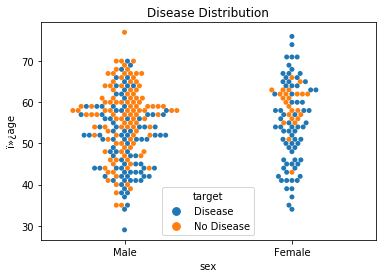

In [38]:
sns.swarmplot(x = "sex", y = 'ï»¿age', hue = "target", data = df)
plt.title("Disease Distribution")

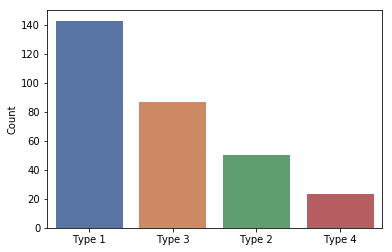

In [27]:
labels_dict_cp = {0:'Type 1',1:'Type 2',2:'Type 3',3:'Type 4'}
labels_cp =df['cp'].value_counts().rename(index=labels_dict_cp).index
values_cp =df['cp'].value_counts().values
s= sns.barplot(x = labels_cp, y = values_cp, palette= 'deep')
plt.ylabel('Count')
plt.show(s)

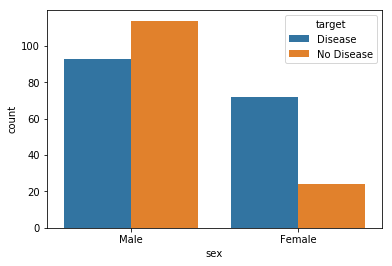

In [24]:
df['sex'].replace(1,'Male',inplace=True)
df['sex'].replace(0,'Female',inplace=True)
df['target'].replace(1,'Disease',inplace=True)
df['target'].replace(0,'No Disease',inplace=True)
sns.countplot(x=df['sex'],hue=df['target'])

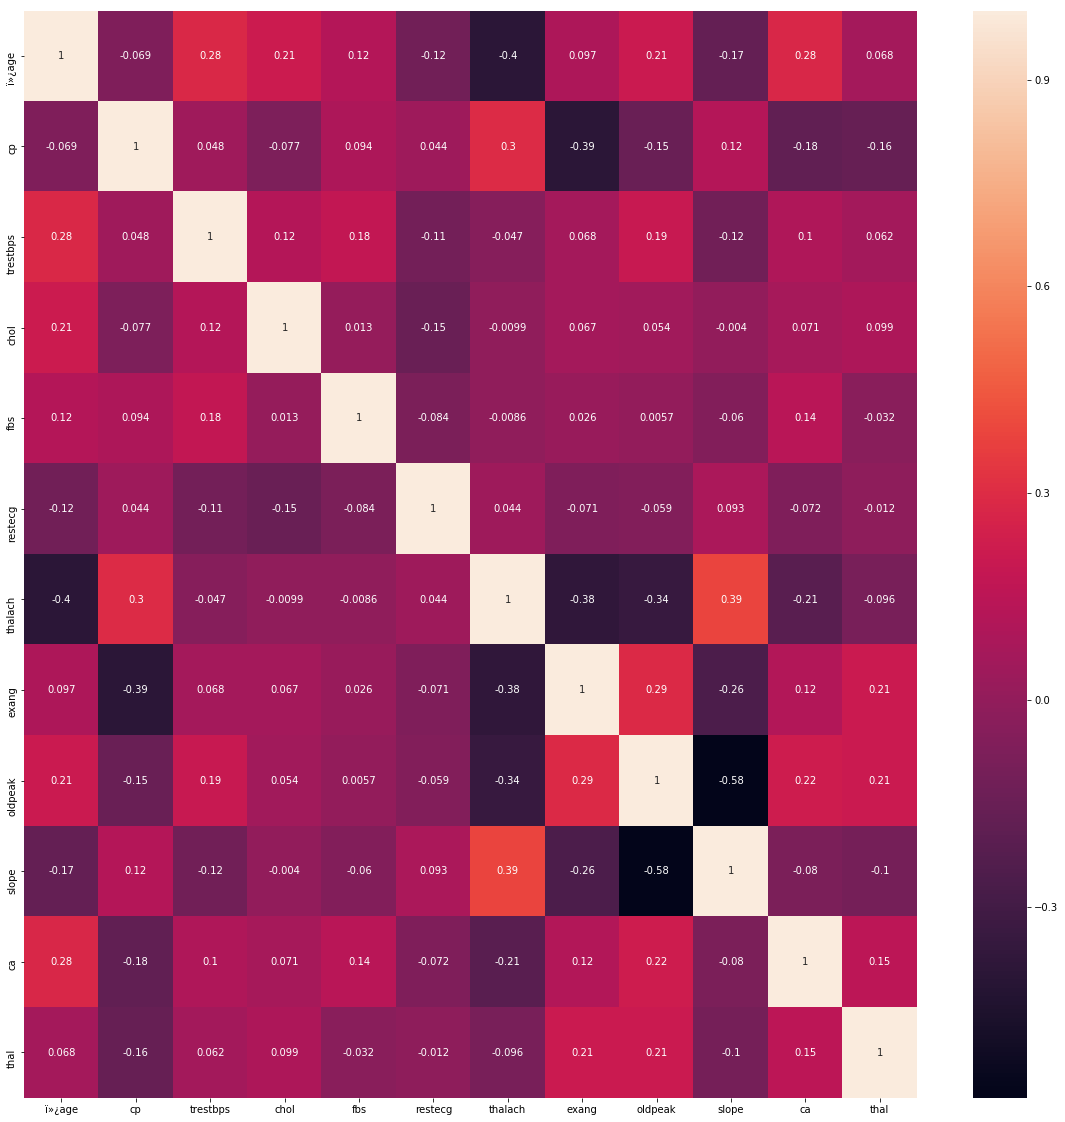

In [29]:
correlation_matrix = df.corr()
top_correlated_features = correlation_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_correlated_features].corr(),annot=True)